<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Business-Value" data-toc-modified-id="Business-Value-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Business Value</a></span></li><li><span><a href="#Customer-Churn" data-toc-modified-id="Customer-Churn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Customer Churn</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Strategy</a></span></li></ul></li><li><span><a href="#Import-Data-&amp;-Packages" data-toc-modified-id="Import-Data-&amp;-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data &amp; Packages</a></span></li><li><span><a href="#EDA-&amp;-Cleaning" data-toc-modified-id="EDA-&amp;-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA &amp; Cleaning</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary Statistics</a></span><ul class="toc-item"><li><span><a href="#Charges-vs.-Customer-Service-Calls" data-toc-modified-id="Charges-vs.-Customer-Service-Calls-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Charges vs. Customer Service Calls</a></span></li></ul></li><li><span><a href="#Normality-Check" data-toc-modified-id="Normality-Check-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Normality Check</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Correlation Matrix</a></span><ul class="toc-item"><li><span><a href="#Minutes-vs.-Charges" data-toc-modified-id="Minutes-vs.-Charges-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Minutes vs. Charges</a></span></li></ul></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Categorical Features</a></span><ul class="toc-item"><li><span><a href="#States" data-toc-modified-id="States-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>States</a></span></li><li><span><a href="#Area-Code" data-toc-modified-id="Area-Code-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Area Code</a></span></li><li><span><a href="#Account-Length" data-toc-modified-id="Account-Length-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Account Length</a></span></li><li><span><a href="#Churn:-Target-Variable" data-toc-modified-id="Churn:-Target-Variable-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Churn: Target Variable</a></span></li></ul></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encode-Categorical-Data" data-toc-modified-id="One-Hot-Encode-Categorical-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>One-Hot-Encode Categorical Data</a></span></li><li><span><a href="#Separate-Target-&amp;-Predictor-Variables" data-toc-modified-id="Separate-Target-&amp;-Predictor-Variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Separate Target &amp; Predictor Variables</a></span></li><li><span><a href="#Address-Class-Imbalance" data-toc-modified-id="Address-Class-Imbalance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Address Class Imbalance</a></span></li></ul></li><li><span><a href="#Baseline-Models" data-toc-modified-id="Baseline-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Instantiate-Classifiers" data-toc-modified-id="Instantiate-Classifiers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Instantiate Classifiers</a></span></li><li><span><a href="#Fit-&amp;-Predict" data-toc-modified-id="Fit-&amp;-Predict-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fit &amp; Predict</a></span></li></ul></li><li><span><a href="#Accuracy-Metrics" data-toc-modified-id="Accuracy-Metrics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Accuracy Metrics</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrices" data-toc-modified-id="Confusion-Matrices-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Confusion Matrices</a></span></li><li><span><a href="#Classification-Reports" data-toc-modified-id="Classification-Reports-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Classification Reports</a></span></li><li><span><a href="#ROC-Curves" data-toc-modified-id="ROC-Curves-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>ROC Curves</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Feature-Ranking" data-toc-modified-id="Feature-Ranking-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Feature Ranking</a></span></li></ul></li><li><span><a href="#Accuracy-Scores" data-toc-modified-id="Accuracy-Scores-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Accuracy Scores</a></span></li></ul></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Bagging Classifier</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Future Work</a></span></li></ul></div>

## Intro

### Problem Statement



### Business Value



### Customer Churn



### Strategy

We will create baseline models for 6 different classifiers and then tune the top 3 using GridSearchCV.

We care mostly about the true positive rate. Since the cost of acquiring a customer is higher than the cost of retaining a customer, it is okay if we have some false positives. We also want to minimize false negatives. Therefore we will be optimizing for recall.

The models we will be testing are:
- Logistic Regression Classifier
- k-Nearest Neighbors Classifier (KNN)
- Bagging Tree Classifier (with Decision Trees)
- Random Forest Classifier
- Support Vector Classification Classifier (SVC)
- XGBoost Classifier

## Import Data & Packages

In [330]:
### Import necessary libraries & packages ###

import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Import Data ###
data = pd.read_csv('telecom_churn_data.csv')
df = pd.DataFrame(data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## EDA & Cleaning

Let's take a look at what we're working with.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Let's keep area code and drop phone number. We can one-hot encode area code, however the phone numbers are high cardinality data and for our purposes they give a lot more detail (and require a lot more bandwidth) than we would like to work with.

Those are the only objects other than state. We'll one-hot encode state also.

Our target is churn, which is in boolean format.

Looks great. Next we'll explore and clean the data if need be. 



In [4]:
df.isnull().values.any()

False

Great! Looks like there aren't any null values.

Let's go ahead and drop the rows we aren't going to be using for this analysis.

In [5]:
# Feature to drop
drop = ['phone number']

# Drop feature
df = df.drop(drop,axis=1)

### Summary Statistics

In [6]:
# Summary Statistics
df.describe().round()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0


I'm curious to see if there's any relationship between customer service calls, charges, and churn. 

We'll be able to explore how each feature relates to churn when we do feature ranking. For now I want to see if there's a relationship between charges and customer service calls. 

#### Charges vs. Customer Service Calls

I'm curious to see if there's a relationship between charges and customer service calls.

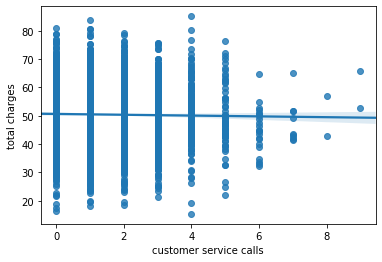

In [7]:
# Create new feature 'total charges' 
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total intl charge']

# Plot
sns.regplot(df['customer service calls'], df['total charges']);

It doesn't look like there's any direct relationship between charges and customer service calls. 

Let's take a look at the relationships between customer service calls, voice mail plan, international plan and churn.

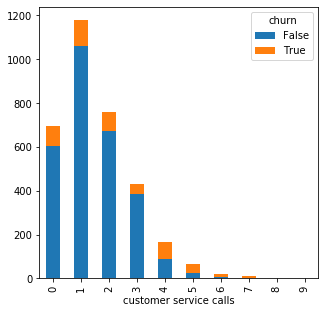

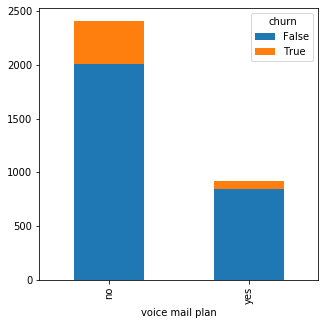

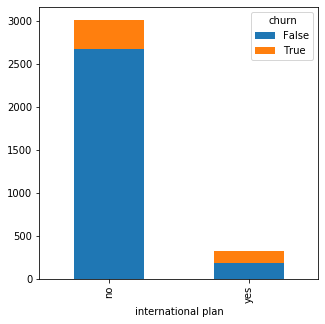

In [8]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

### Normality Check

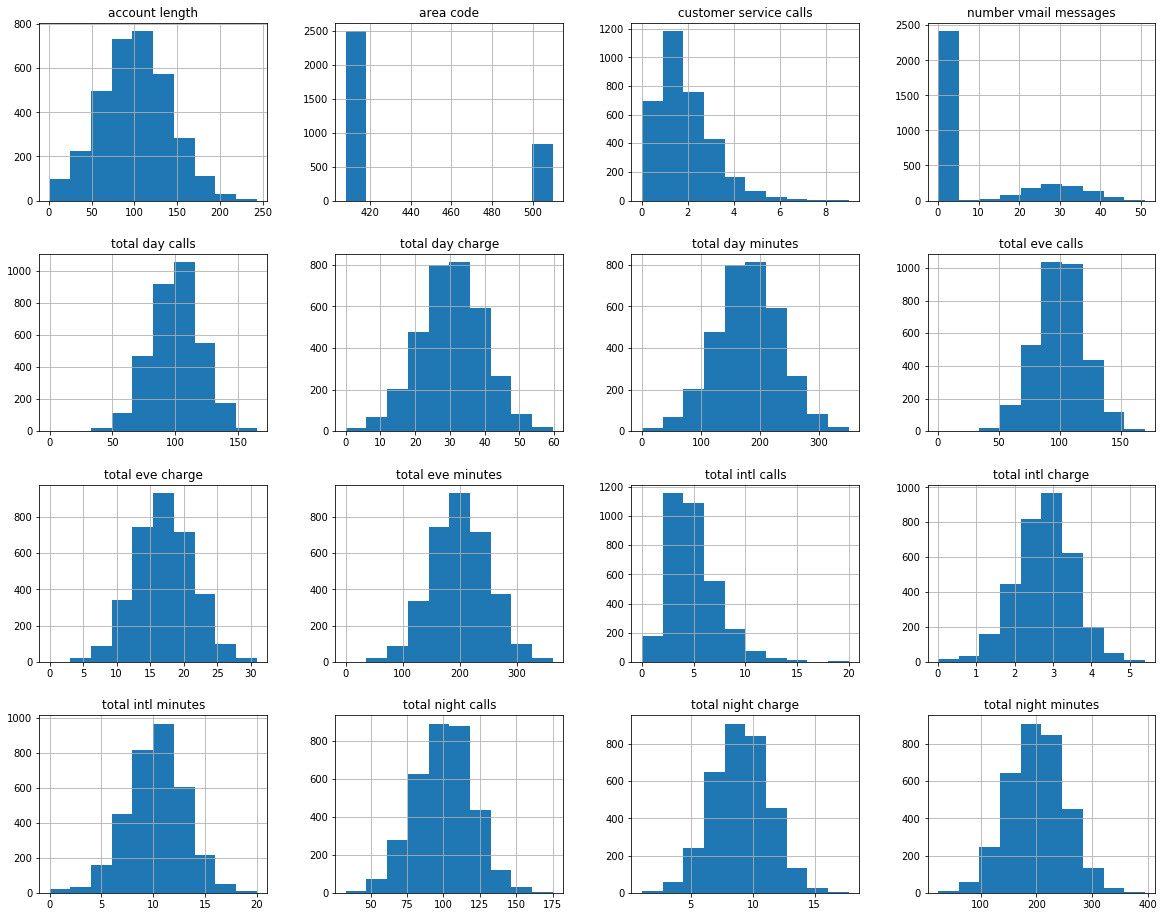

In [9]:
# Define which features are intergers/floats for histograms
hist_cols = ['account length',
             'area code',
             'number vmail messages',
             'total day minutes',
             'total day calls',
             'total day charge',
             'total eve minutes',
             'total eve calls',
             'total eve charge',
             'total night minutes',
             'total night calls',
             'total night charge',
             'total intl minutes',
             'total intl calls',
             'total intl charge',
             'customer service calls']

# Define figure size & axis
fig,ax = plt.subplots(figsize = (20,16))

# Plot histograms
df.hist(column=hist_cols,ax=ax);

Some of these features are skewed, e.g. customer service calls, international calls and international charges. 

We can see some of these appear to be directly correlated, which makes sense such as calls, charges and minutes. E.g. total day calls, charges, and minutes, international calls, charges and minutes, and night calls, charges and minutes. 

Since ensemble methods work best when predictors are as independent as possible, we will probably just keep one of each of the three when creating our ensemble.

Number of voicemail messages appears to be bimodal. We could bin them, but we'll see how the classifier goes and do so if necessary. 

### Correlation Matrix

We want to see which features are correlated so we can remove redundant predictors.

In [10]:
abs(df.corr())>0.75

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charges
account length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area code,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total day minutes,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True
total day calls,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True
total eve minutes,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
total night minutes,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False


It seems the 'charge' categories are highly correlated with their respective 'minutes' categories, so let's go ahead and drop those.

I'll print out the regression plots to make sure.

#### Minutes vs. Charges

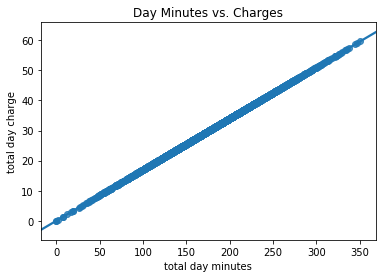

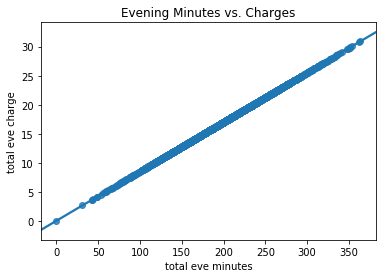

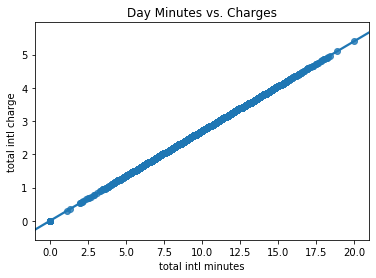

In [11]:
# Day
sns.regplot(df['total day minutes'], df['total day charge'])
plt.title('Day Minutes vs. Charges')
plt.show()

# Evening
sns.regplot(df['total eve minutes'], df['total eve charge'])
plt.title('Evening Minutes vs. Charges')
plt.show()

# International
sns.regplot(df['total intl minutes'], df['total intl charge'])
plt.title('Day Minutes vs. Charges')
plt.show()

It's pretty clear how strongly correlated these are, which makes sense. Let's go ahead and remove them. 

I'm also going to remove the column we added totaling the charges, as that would be correlated as well. 

In [12]:
# drop = ['total day charge','total eve charge','total intl charge', 'total charges']
# df = df.drop(drop, axis=1)

Testing w/ keeping charges instead of minutes. I want to see if feature importance ranking changes at all. 

In [13]:
drop = ['total day minutes','total eve minutes','total intl minutes'] #, 'total charges']
df = df.drop(drop, axis=1)

Let's take a look at the features that are categorical. 

### Categorical Features

#### States

In [14]:
# Summary Stastics
df.state.describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

It looks like all states are represented, some more than others with West Virginia being the max at 106 out of 3333. 

Let's take a look at churn by state.

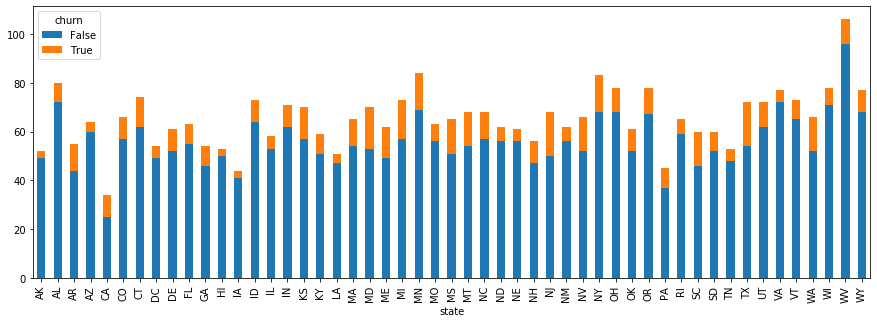

In [15]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5)) 
plt.show()

#### Area Code

Value Counts:
415    1655
510     840
408     838
Name: area code, dtype: int64


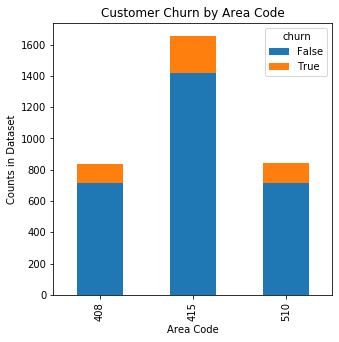

In [16]:
# Print area code value counts
print("Value Counts:")
print(df['area code'].value_counts())

# Plot bar plot of area code value counts
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.title('Customer Churn by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Counts in Dataset')
plt.show()

It seems strange that with 51 states represented there are only 3 area codes. I did a little research, however this issue did not seem to be addressed anywhere online. 

A possibility is that people had gotten a cell phone number in one state and then moved to another state. I'm not sure how likely that is, however this does seem like a relatively small data set at 3333, so it could be possible. 

These area codes are all from Northern California in the San Francisco Bay Area:
- 415: Greater San Francisco Bay area, San Francisco City & County, the majority of Marin County and a small portion of San Mateo County
- 510: East Bay cities in Northern California including some cities in west Contra Costa and Alameda counties like Hayward and Fremont
- 408: City of San Jose, as well as the Cities of Campbell, Cupertino, Gilroy, Los Gatos, Milpitas, Monte Sereno, Morgan Hill, Santa Clara, Saratoga, Sunnyvale, and a portion of Palo Alto

Resources: 
- www.cpuc.ca.gov
- www.ringcentral.com

#### Account Length

I'm curious to see if account length is related to churn. As customers who have been with a company longer are known to be more loyal. Let's see.

Summary Statistics for Account Length: 

count    3333.0
mean      101.0
std        40.0
min         1.0
25%        74.0
50%       101.0
75%       127.0
max       243.0
Name: account length, dtype: float64




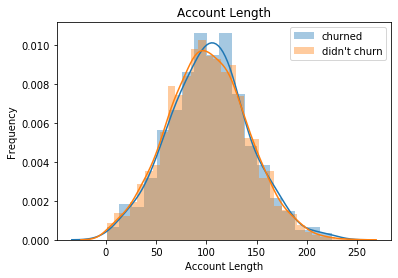

In [17]:
# Print account length summary statistics
print(f"Summary Statistics for Account Length: \n")
print(df['account length'].describe().round())
print("\n")

# Separate churned from didn't churn
churn_df_true = df[df['churn'] == True] 
churn_df_false = df[df['churn'] == False]

# Plot distribution plot of account length
sns.distplot(churn_df_true['account length'], label='churned')
sns.distplot(churn_df_false['account length'], label=f"didn't churn")
plt.title('Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.legend();

There does not appear to be a relationship between churn and account length, as we can see by the overlapping frequency distribusions. 

The dataset did not provide a unit description for account length. No other kernels addressed it either. I did a little research online and did not find further information about this unit length. 

#### Churn: Target Variable

Let's explore our target variable, churn. 

Counts: 
False    2850
True      483
Name: churn, dtype: int64 

Normalized: 
False    0.86
True     0.14
Name: churn, dtype: float64 



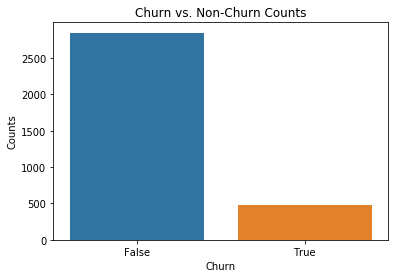

In [18]:
# Print Value Counts
print(f"Counts: \n{df.churn.value_counts()} \n")

# Print Normalized Value Counts
print(f"Normalized: \n{df.churn.value_counts(normalize=True).round(2)} \n")

# Plot Value Counts
sns.countplot(df['churn'])
plt.title('Churn vs. Non-Churn Counts')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

We can see there is a class imbalance here, so we'll want to address that by balancing the classes. We'll use SMOTE further down to accomplish this. 

## Pre-processing

### One-Hot-Encode Categorical Data

I'm using pd.get_dummies to one-hot-encode the categorical data. An alternative would be to use sklearn's OneHotEncoder or LabelEncoder.

I previously ran the models with all 51 states one-hot-encoded. I then dropped them and re-ran the models. They performed much better without the state data. So we're going to leave them dropped here, right we one-hot-encode our categorical data.

In [20]:
# Drop states
drop = ['state']
df = df.drop(drop, axis=1)

# One-hot-encode with pd.get_dumies
df = pd.get_dummies(df,drop_first=True)

# Take a look
df.head()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total charges,international plan_yes,voice mail plan_yes
0,128,415,25,110,45.07,99,16.78,244.7,91,11.01,3,2.70,1,False,64.55,0,1
1,107,415,26,123,27.47,103,16.62,254.4,103,11.45,3,3.70,1,False,47.79,0,1
2,137,415,0,114,41.38,110,10.30,162.6,104,7.32,5,3.29,0,False,54.97,0,0
3,84,408,0,71,50.90,88,5.26,196.9,89,8.86,7,1.78,2,False,57.94,1,0
4,75,415,0,113,28.34,122,12.61,186.9,121,8.41,3,2.73,3,False,43.68,1,0


Looks good. 

### Separate Target & Predictor Variables

Now we're going to separate out the target variable from the predictor variables and train-test split.

In [235]:
# Define X and y variables
y = df['churn']
X = df.drop(['churn'], axis=1)

# Define Random State
seed = 20

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=seed)

# Splitting with X & y in np.array format for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X.values, 
                                                                    y.values, 
                                                                    test_size=0.25, 
                                                                    random_state=seed)

### Address Class Imbalance

Address the class imbalance using SMOTE to synthetically oversample the minority class.

We process XGBoost separately as it uses values only. This will make it easier to batch process when we get to our function that does so.

In [246]:
# Previous original class distribution
print("Before:")
print(f"\n{y_train.value_counts()}")
print(f"\n{pd.Series(y_train_xgb).value_counts()}")

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# np.values format for XGBoost
X_train_resampled_xgb, y_train_resampled_xgb = smote.fit_sample(X_train_xgb, y_train_xgb)

# Preview synthetic sample class distribution
print("\nAfter:\n")
print(f"{pd.Series(y_train_resampled).value_counts()}") 
print(f"\n{pd.Series(y_train_resampled_xgb).value_counts()}") 

Before:

False    2136
True      363
Name: churn, dtype: int64

False    2136
True      363
dtype: int64

After:

True     2136
False    2136
dtype: int64

True     2136
False    2136
dtype: int64


We can see the classes are now balanced. Looks good. Now let's go ahead and start modeling...

## Baseline Models

Create a DataFrame that contains:
- Our 3 initial classifiers
- Class balanced training data (X & y)
- Test data (X & y)

Then create a function to fit our models, make predictions, calculate the
accuracy scores, and return everything in a DataFrame. 

### Instantiate Classifiers

In [172]:
### Instantiate Classifiers ###

# Bagging Tree
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    random_state=seed)

# Random Forest
rnd_clf = RandomForestClassifier(random_state=seed)

# XGBoost 
xgb_clf = xgb.XGBClassifier(random_state=seed)

### Create Dictionary of Classifiers ###

clf_dict = {0:
    {'clf_name': 'Bagging Tree',
     'clfs': bag_clf,
     'X_train': X_train_resampled,
     'X_test': X_test,
     'y_train': y_train_resampled,
     'y_test': y_test},
            1:
    {'clf_name': 'Random Forest',
     'clfs': rnd_clf,
     'X_train': X_train_resampled,
     'X_test': X_test,
     'y_train': y_train_resampled,
     'y_test': y_test},
            2:
    {'clf_name': 'XGBoost',
     'clfs': xgb_clf,
     'X_train': X_train_resampled_xgb,
     'X_test': X_test_xgb,
     'y_train': y_train_resampled_xgb,
     'y_test': y_test_xgb}}

### Convert into DataFrame ##

models_df = pd.DataFrame.from_dict(clf_dict, orient='index')

### Fit & Predict

First we'll define our function, then we'll apply it.

In [296]:
# Define function to fit our models and predict on the training and test sets

def clf_pred(models):
    '''
    Intakes our DataFrame with our models 
        and our X & y, train & test data
    
    Returns a DataFrame with all of our models, 
        metrics and accuracy scores   
    '''
    
    # Initialize matrix to fill
    clf_df = np.zeros((len(models), 25), dtype=object)
    
    for i,model in models.iterrows():
        

        # Classifier Names & Models
        clf_df[i,0] = model['clf_name']
        clf_df[i,1] = model['clfs'] 
        
        ### Assign Variables ###
        # We do this here because XGBoost takes 
        # np.array format unlike the other models
        X_train = model['X_train']
        X_test = model['X_test']
        y_train = model['y_train']
        y_test = model['y_test']

        ### Initialize Timer ### 
        start_time = time.time()
        
        ### Fit & Predict ###
    
        # Fit Model
        classifier = model['clfs'].fit(X_train, y_train)
        
        # Calculate time to fit model
        stop_time = time.time()
        runtime = (stop_time - start_time)
        clf_df[i,2] = runtime
    
        # Predict
        y_pred_test = classifier.predict(X_test)
        y_pred_train = classifier.predict(X_train)
        clf_df[i,3] = y_pred_test
        clf_df[i,4] = y_pred_train
    
        # y_score
        y_score_test = classifier.predict_proba(X_test)
        y_score_train = classifier.predict_proba(X_train)
        clf_df[i,5] = y_score_test
        clf_df[i,6] = y_score_train
    
        # False & True Positive Rates
        clf_df[i,7], clf_df[i,8], thresholds_test = roc_curve(y_test, y_score_test[:,1])
        clf_df[i,9], clf_df[i,10], thresholds_train = roc_curve(y_train, y_score_train[:,1])
        
        ### Accuracy Scores ### 
        
        # Precision
        clf_df[i,11] = precision_score(y_test, y_pred_test)
        clf_df[i,12] = precision_score(y_train, y_pred_train)
        
        # Recall 
        clf_df[i,13] = recall_score(y_test, y_pred_test)
        clf_df[i,14] = recall_score(y_train, y_pred_train)        
        
        # F1
        clf_df[i,15] = f1_score(y_test, y_pred_test)
        clf_df[i,16] = f1_score(y_train, y_pred_train)  
        
        # Accuracy
        clf_df[i,17] = accuracy_score(y_test, y_pred_test)
        clf_df[i,18] = accuracy_score(y_train, y_pred_train)
        
        # AUC
        clf_df[i,19] = roc_auc_score(y_test, y_pred_test)
        clf_df[i,20] = roc_auc_score(y_train, y_pred_train)
        
        ### Add X & y values to have everything in one place ### 
        # These are class balanced/resampled #
        clf_df[i,21] = X_train
        clf_df[i,22] = X_test
        clf_df[i,23] = y_train
        clf_df[i,24] = y_test        
    
    ### Create DataFrame ###
    
    # Column Names
    columns = ['Classifier',
               'Model',
               'Runtime',
               'Test Preds',
               'Train Preds',
               'Test y-Score',
               'Train y-Score',
               'Test FPR',
               'Test TPR',
               'Train FPR',
               'Train TPR',
               'Test Precision',
               'Train Precision',
               'Test Recall',
               'Train Recall',
               'Test F1',
               'Train F1',
               'Test Accuracy',
               'Train Accuracy',
               'Test ROC AUC',
               'Train ROC AUC',
               'X_train',
               'X_test',
               'y_train',
               'y_test'
              ]
    
    # Create DataFrame
    clf_df = pd.DataFrame(clf_df, columns=columns)
    
    return clf_df

Now let's go ahead and fit our models.

In [297]:
# Fit our models
clf_preds = clf_pred(models_df)

# Take a look at our resulting DataFrame
clf_preds

,Classifier,Model,Runtime,Test Preds,Train Preds,Test y-Score,Train y-Score,Test FPR,Test TPR,Train FPR,...,Test F1,Train F1,Test Accuracy,Train Accuracy,Test ROC AUC,Train ROC AUC,X_train,X_test,y_train,y_test
0,Bagging Tree,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.281102,"[True, False, False, False, True, False, True,...","[False, False, True, False, False, False, Fals...","[[0.0, 1.0], [0.8, 0.2], [0.9, 0.1], [1.0, 0.0...","[[1.0, 0.0], [1.0, 0.0], [0.3, 0.7], [1.0, 0.0...","[0.0, 0.004201680672268907, 0.0098039215686274...","[0.0, 0.6083333333333333, 0.6666666666666666, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0028089887640...",...,0.838983,0.995296,0.954436,0.995318,0.900595,0.995318,"[[42.0, 415.0, 0.0, 52.0, 25.62, 96.0, 20.97, ...",account length area code number vmail ...,"[False, False, True, False, False, False, Fals...",2824 True 1106 False 972 False 1188...
1,Random Forest,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.859367,"[True, False, False, False, False, False, True...","[False, False, True, False, False, False, Fals...","[[0.07, 0.93], [0.8, 0.2], [0.96, 0.04], [0.93...","[[0.99, 0.01], [0.93, 0.07], [0.16, 0.84], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00140056...","[0.0, 0.05, 0.08333333333333333, 0.18333333333...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.841667,1,0.954436,1,0.907528,1,"[[42.0, 415.0, 0.0, 52.0, 25.62, 96.0, 20.97, ...",account length area code number vmail ...,"[False, False, True, False, False, False, Fals...",2824 True 1106 False 972 False 1188...
2,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.668415,"[True, False, False, False, True, False, True,...","[False, False, True, False, False, False, Fals...","[[0.016164303, 0.9838357], [0.88989234, 0.1101...","[[0.95031375, 0.04968623], [0.9508761, 0.04912...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.001400560224089635...","[0.0, 0.008333333333333333, 0.1416666666666666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.859574,0.975285,0.960432,0.975655,0.911029,0.975655,"[[42.0, 415.0, 0.0, 52.0, 25.62, 96.0, 20.97, ...","[[81.0, 415.0, 0.0, 48.0, 55.2, 82.0, 20.09, 1...","[False, False, True, False, False, False, Fals...","[True, False, False, False, True, False, True,..."


We can see how much faster our Bagging Tree Classifier trains than our other models. None take that long, but it is relatively significantly faster. On larger datasets this would save us time.

## Accuracy Metrics

### Confusion Matrices

Let's take a look at the confusion matrices. We've normalized them for easy interpretation. We care most about recall or the true positive rate.

It's okay if we have some false positives in there, but we do want to minimize false negatives. Let's take a look.

We'll define the function first and then apply it to our baseline models.

In [301]:
# Define function to print out normalized cofusion matrices
def norm_cm(clf_df):
    '''
    Function that prints out normalized confusion matrices
    for our classification models.
    
    Inputs:
        clf_df: our DataFrame with out classifier metrics. 
        
    Returns: Prints out normalized confustion matrices for
        each of our models in our classifer DataFrame.
    '''

    for i,clf in clf_df.iterrows():
        
        # Create Subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
        
        # Figure Title
        fig.suptitle(f"{clf['Classifier']}:")
                     
        ### Plot ###
                     
        # Plot Confusion Matrix - Train Set
        plot_confusion_matrix(clf['Model'], 
                              clf['X_train'], 
                              clf['y_train'], 
                              cmap='Blues',
                              normalize='true',
                              ax=ax1)
        # Subplot Title
        ax1.set_title('Train')
        
        # Plot Confusion Matrix - Test Set
        plot_confusion_matrix(clf['Model'], 
                              clf['X_test'], 
                              clf['y_test'], 
                              cmap='Blues',
                              normalize='true',
                              ax=ax2)
        # Subplot Title
        ax2.set_title('Test')
        
    return plt.show()

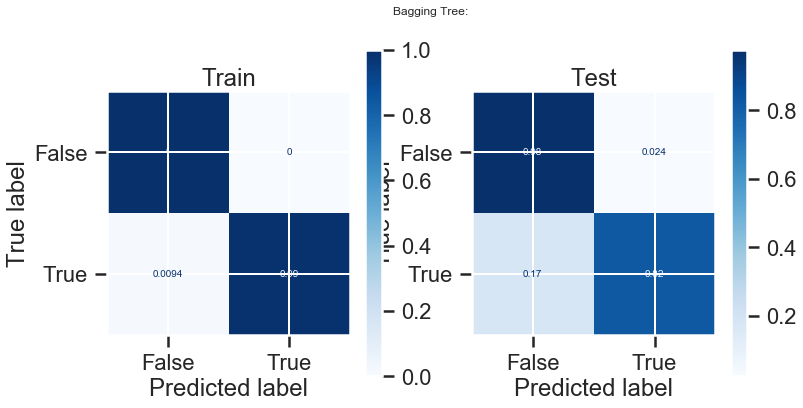

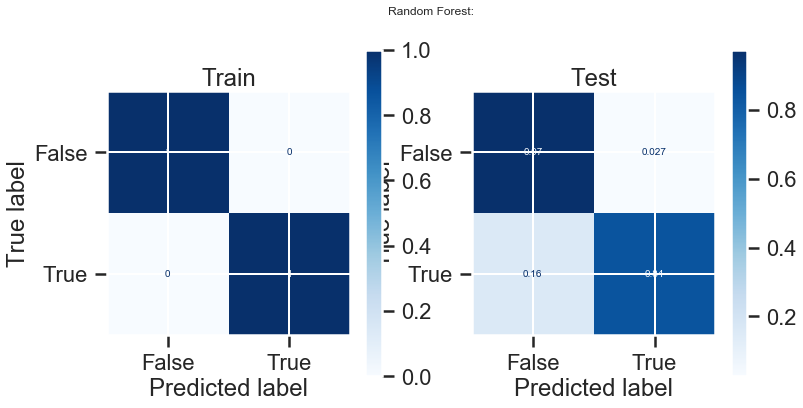

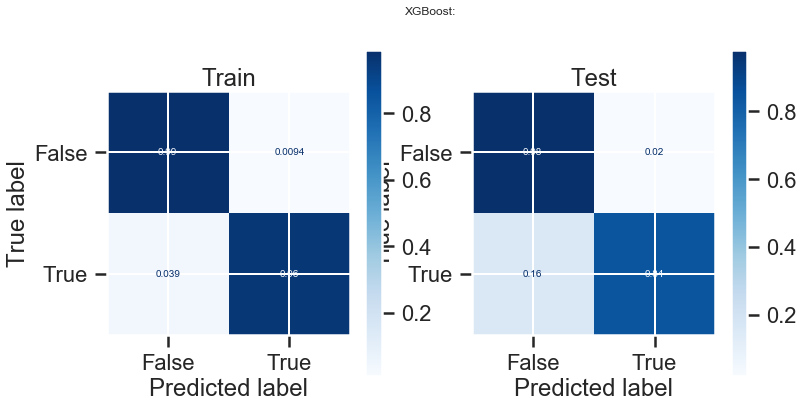

In [302]:
# Apply to our baseline models
norm_cm(clf_preds)

It definitely looks like the models are overfitting. They're still performing well on the test set. We'll want to make sure we address this in GridSearchCV when we tune our models. 

### Classification Reports

Let's take a look at the Classification Reports for our baseline models. We'll print out both the training and test sets. We can already see our models are all overfitting but all still performing pretty well.

In [292]:
# Define function to print out classification reports 

def clf_reports(clf_df):
    '''
    Function that prints out classification reports.
    
    Inputs:
        clf_df: our DataFrame with out classifier metrics. 
        
    Returns: Prints out normalized confustion matrices for
        each of our models in our classifer DataFrame.
    '''
    for i,clf in clf_df.iterrows():
          
        print(f"{clf['Classifier']}:\n")
        print("Train:")
        # Print Classification Report - Train
        print(classification_report(clf['y_train'], clf['Train Preds']))

        print("\nTest:")
        # Print Classification Report - Test
        print(classification_report(clf['y_test'], clf['Test Preds']))
              
    return

In [303]:
# Print out Classification Reports 
clf_reports(clf_preds)

Bagging Tree:

Train:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2136
        True       1.00      0.99      1.00      2136

    accuracy                           1.00      4272
   macro avg       1.00      1.00      1.00      4272
weighted avg       1.00      1.00      1.00      4272


Test:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       714
        True       0.85      0.82      0.84       120

    accuracy                           0.95       834
   macro avg       0.91      0.90      0.91       834
weighted avg       0.95      0.95      0.95       834

Random Forest:

Train:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2136
        True       1.00      1.00      1.00      2136

    accuracy                           1.00      4272
   macro avg       1.00      1.00      1.00      4272
weighted avg       1.0

It's pretty apparent that our classifiers are overfitting. XGBoost seems to have performed the best in not overfitting as much as the others, but still having high accuracy.

### ROC Curves

Let's go ahead and plot all of our classifier ROC curves together, so we can see our true positive vs. false positive rates.

In [369]:
# Define function to plot ROC curves together

def plot_roc(clf_df):
    '''
    Plots ROC curves for each classifier in DataFrame on
    the same plot. Prints AUC value next to classifier name
    in plot legend.
    
    Input: Dataframe containing classifier prediction metrics
    
    Output: ROC plot
    '''
    
    # Set figure size & ax
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    fig.suptitle('ROC Curves', fontsize=24)    

    # Plot each curve
    for i,clf in clf_df.iterrows():
                 
        # Training Set 
        ax1.plot(clf['Train FPR'], 
                 clf['Train TPR'], 
                 linestyle='-', 
                 lw=3,
                 label=(str(clf['Classifier']) + '- AUC:' + str("%0.2f" % clf['Train ROC AUC']))
                )
                 
        # Sub Title         
        ax1.set_title('Train')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_xlabel('True Positive rate')
                        
        
        # Plot threshold
        ax1.plot([0, 1], [0, 1], color='grey', lw=3, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        
        ax1.legend(loc='lower right')
                        
                        
        # Test Set                
        ax2.plot(clf['Test FPR'], 
                 clf['Test TPR'], 
                 linestyle='-', 
                 lw=3, 
                 label=(str(clf['Classifier']) + '- AUC:' + str("%0.2f" % clf['Test ROC AUC']))
                )

        # Sub Title
        ax2.set_title('Test')
        ax2.set_xlabel('False Positive Rate')
        ax2.set_xlabel('True Positive rate')
                 
        # Plot threshold
        ax2.plot([0, 1], [0, 1], color='grey', lw=3, linestyle='--')
        ax2.set_xlim([-0.05, 1.0])
        ax2.set_ylim([0.0, 1.05])
                        
        ax2.legend(loc='lower right')

    return plt.show()

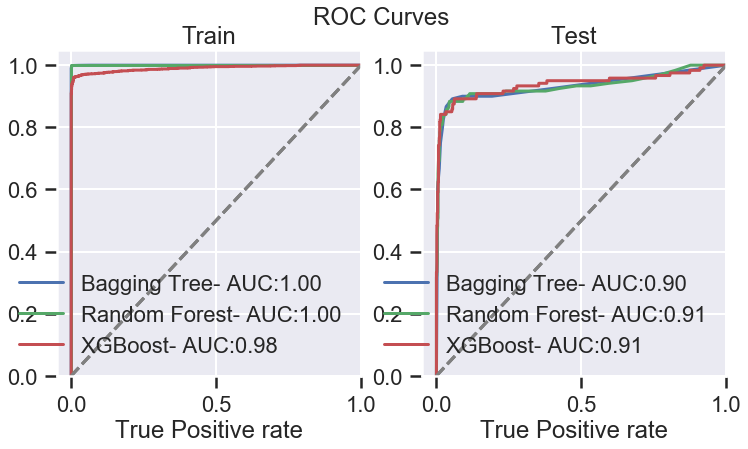

In [370]:
# Plot ROC curves

plot_roc(clf_preds)

#### Cross-validation

I'm curious to test different values of crossvalidation k-folds to see if a higher value results in a higher accuracy score.

In [270]:
cv_vals = [3,6,10]

for cv_val in cv_vals:
    rf_clf = RandomForestClassifier(random_state=seed)
    mean_rf_cv_score = np.mean(cross_val_score(rf_clf, 
                                               X_train_resampled, 
                                               y_train_resampled, 
                                               cv=cv_val))

    print(f"Mean Cross Validation Score for cv={cv_val}: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for cv=3: 95.27%
Mean Cross Validation Score for cv=6: 95.69%
Mean Cross Validation Score for cv=10: 96.47%


We can see that a higher cross-validation k-fold does result in higher accuracy. However only by a tiny bit, and the computational time for higher folds increases. When it comes time to use cv in our Grid Search section, we will use cv=3.  

#### Feature Ranking

We're going to plot the feature importance ranking, so we can see which features are most important to our classification of a customer's likelihood to churn.

I'll create a function so we can output this plot again after we tune our hyperparameters for our XGBoost model.

In [249]:
# Create a function to output our feature importance plot
def feat_rank(xgb_clf,X):
    '''
    Input XGBoost fitted classifier and X: DataFrame of features 
    
    Returns ranked feature importance plot
    '''

    # We want to add back our column names to our feature importances
    ft_rank = pd.Series(xgb_clf.feature_importances_, index = X.columns)

    # Sort ascending
    ft_rank = ft_rank.sort_values(ascending = True)

    # Plot
    ft_rank.plot(kind='barh', width=.75, edgecolor = "black", figsize=(12,10), fontsize=18)
    plt.title('Feature Importance Ranking', fontsize=22)

    return plt.show()

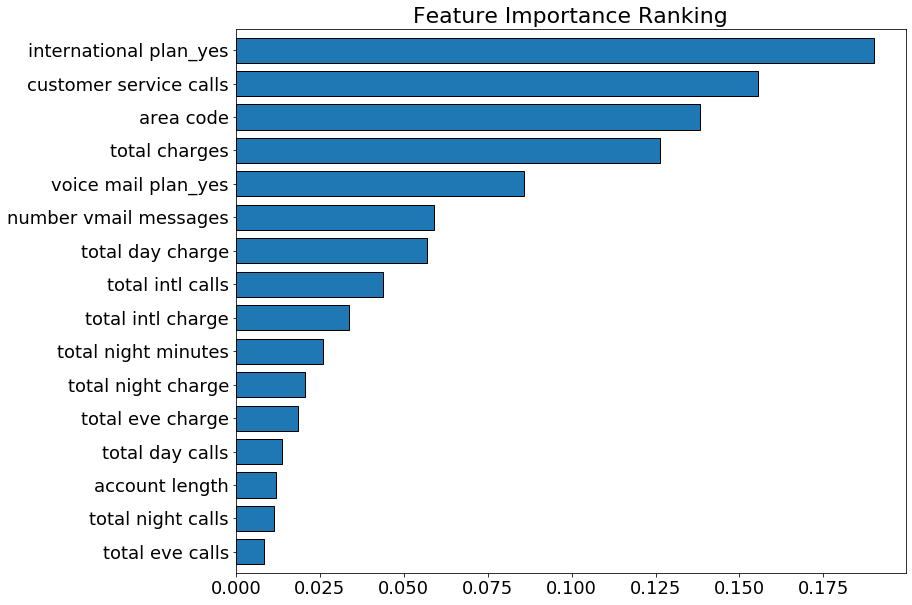

In [32]:
# Print feature importance plot

feat_rank(xgb_clf,X)

Again, we want to maximize recall, yet still have good accuracy. We can see here that XGBoost and Random Forest perform the best. 

Bagging Tree did pretty well too, which makes sense as it's an ensemble method, but not as well as the others. We can probably tune it to perform better, but we'll see when we get there. 

We can see here that our top three classifers we identified also have the highest AUC.

Let's take a look at a table of all of our scores together.

### Accuracy Scores

Create a function to return us a table of our relavant accuracy scores.

In [40]:
# Create DataFrame of accuracy scores
def acc_df(clf_df):
    '''
    Takes in DataFrame of classifier prediction metrics
    and returns a table showing the accuracy scores of 
    interest.
    
    Input: Classifier DataFrame
    Output: Accuracy score table
    '''

    cols = ['clf','accuracy','roc_auc','recall']
    acc_scores = clf_df[cols]

    # Sort
    acc_scores = acc_scores.sort_values(by=['accuracy'], ascending=False)

    # Round to two decimal places
    cols = ['accuracy','roc_auc','recall']
    acc_scores[cols] = acc_scores[cols].applymap(lambda x: "{:.2f}".format(x))

    # Give it a new index
    acc_scores.columns = ['Classifier', 'Accuracy', 'AUC', 'Recall']

    # Drop index
    acc_scores = acc_scores.style.hide_index()
    
    return acc_scores

In [41]:
# Print out table of accuracy scores

acc_df(clf_df)

Classifier,Accuracy,AUC,Recall
XGBoost,0.96,0.91,0.85
Bagging Decision Tree,0.95,0.90,0.82
Random Forest,0.95,0.91,0.84
K-Nearest Neighbors,0.82,0.81,0.80
Logistic Regression,0.71,0.74,0.78
Linear SVC,0.58,0.73,0.93


Let's go ahead and tune our identified top performing classifiers:
- Random Forest
- XGBoost
- Bagging Decision Tree

The models are already performing well, so we do run a chance of overfitting, but let's go ahead and take a look anyway.

## Hyperparameter Tuning

We're now going to tune the hyperparameters of our top 3 performing models to see if we can improve them. I'm going to use GridSearchCV to search for the best values for our hyperparamters, and I'm going to tune for highest recall score.

We're going to store the relevant metrics from each classifier in a list together like we did before.

In [61]:
# Empty list to store classifier data
clf_df_best = []

### Grid Search

Define function to conduct grid search on our models' hyperparameters.

In [43]:
# Define Function to Conduct Grid Search
def grid_search(params, clf, X_train, y_train, cv=5, scoring='accuracy'):
    '''
    Conducts gridsearch using GridSearchCV
    
    Inputs:
        params: parameter grid in GridSearchCV dictionary format
        clf: classifier 
        cv: k-folds for crossvalidation
        scoring: scoring metric for optimization
            'accuracy','recall','precision','f1'
            
    Returns:
        Best score for training accuracy
        Optimal parameters for model
    '''
    clf_grid_search = GridSearchCV(clf,
                                  param_grid=params,
                                  cv=cv,
                                  scoring=scoring)
    clf_grid_search.fit(X_train, y_train)
    print(f"Training Accuracy: {clf_grid_search.best_score_ :.2%} \n")
    print(f"Optimal Parameters: {clf_grid_search.best_params_}")

### Bagging Classifier

#### Grid Search

In [44]:
param_grid = {
'n_estimators': [10, 50, 100],
'max_samples' : [10, 100],
'base_estimator__bootstrap': [True, False],
'base_estimator__n_estimators': [10, 50, 100],
}

bg_clf = BaggingClassifier(base_estimator=RandomForestClassifier())

grid_search(param_grid, 
            bg_clf,  
            X_train_resampled, 
            y_train_resampled,
            cv=3,
            scoring='recall')

Training Accuracy: 87.22% 

Optimal Parameters: {'base_estimator__bootstrap': False, 'base_estimator__n_estimators': 10, 'max_samples': 100, 'n_estimators': 10}


In [45]:
# Define function to fit model and predict

# Then can make a dataframe of classifiers & their parameters & 
# create a function that processes them & returns that grid like
# before with all the info we want 

# create functions for outputs before and use those again

# this will look and be epic and you're doing an epic job!!! I love you! <3
# And I am so very proud of you. Keep up the EPIC work, Jessica! Keep up the
# excellent work and showing up in the world as who you TRUELY ARE! I LOVE YOU!
# XOXO, ~ Jessica <3 



In [62]:
# Instantiate Classifier
bag_clf_best = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=100, 
    bootstrap=False,
    random_state=seed)

# Fit Model
bag_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the Test Set
y_pred_bag_best = bag_clf_best.predict(X_test)

# Check false positive and true positive rates
y_score_bag_best = bag_clf_best.predict_proba(X_test)
fpr_bag_best, tpr_bag_best, thresholds_bag = roc_curve(y_test, y_score_bag_best[:, 1])

bagc_best = ['Bagging Decision Tree',
       bag_clf,
       y_pred_bag_best,
       y_score_bag,
       accuracy_score(y_test, y_pred_bag_best),
       roc_auc_score(y_test, y_pred_bag_best),
       recall_score(y_test, y_pred_bag_best),
       fpr_bag_best,
       tpr_bag_best]

clf_df_best.append(bagc_best)

### Random Forest Classifier

#### Grid Search

In [47]:
### Define Parameter Grid ###
rf_param_grid = {'n_estimators': [10, 100, 500],
                 'criterion': ['gini', 'entropy'],
                 'max_leaf_nodes': [10, 65],}

In [48]:
### Conduct Grid Search ###
rf_grid_search = GridSearchCV(rf_clf, 
                              rf_param_grid, 
                              cv=3, 
                              scoring = 'recall')

# Fit Model
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Return Best 
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 91.57%

Optimal Parameters: {'criterion': 'entropy', 'max_leaf_nodes': 65, 'n_estimators': 100}


In [63]:
# Instantiate model w/optimal parameters
rnd_clf_best = RandomForestClassifier(criterion='entropy',
                                      max_leaf_nodes=65,
                                      n_estimators=500,
                                      n_jobs=-1,
                                      random_state=seed)

# Fit model
rnd_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf_best = rnd_clf_best.predict(X_test)

# Check false positive and true positive rates
y_score_rf_best = rnd_clf_best.predict_proba(X_test)
fpr_rf_best, tpr_rf_best, thresholds = roc_curve(y_test, y_score_rf_best[:, 1])

rfc_best = ['Random Forest',
       rnd_clf_best,
       y_pred_rf_best,
       y_score_rf_best,
       accuracy_score(y_test, y_pred_rf_best),
       roc_auc_score(y_test, y_pred_rf_best),
       recall_score(y_test, y_pred_rf_best),
       fpr_rf_best,
       tpr_rf_best]

clf_df_best.append(rfc_best)

### XGBoost Classifier

In [50]:
param_grid_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2],
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [51]:
xgb_clf = xgb.XGBClassifier(random_state=seed) 
grid_search(param_grid_xgb, 
            xgb_clf,  
            X_train_resampled_xgb, 
            y_train_resampled_xgb,
            cv=3,
            scoring='recall')

KeyboardInterrupt: 

In [64]:
# Instatiate classifier
xgb_clf_best = xgb.XGBClassifier(
    gamma=0.5,
    max_depth=5,
    min_child_weight=5,
    n_estimators=100,
    subsample=1,
    random_state=seed) 

# Fit model
xgb_clf_best.fit = xgb_clf_best.fit(X_train_resampled_xgb, y_train_resampled_xgb)

# Predict on train & test sets
y_pred_xgb_best = xgb_clf_best.predict(X_test_xgb)

# Check false positive and true positive rates
y_score_xgb_best = xgb_clf_best.predict_proba(X_test_xgb)
fpr_xgb_best, tpr_xgb_best, thresholds_xgb = roc_curve(y_test_xgb,y_score_xgb_best[:, 1])

xgbc_best = ['XGBoost',
       xgb_clf_best,
       y_pred_xgb_best, 
       y_score_xgb_best,
       accuracy_score(y_test, y_pred_xgb_best),
       roc_auc_score(y_test, y_pred_xgb_best),
       recall_score(y_test, y_pred_xgb_best),
       fpr_xgb,
       tpr_xgb]

clf_df_best.append(xgbc_best)

In [65]:
# Convert our classifier list to pandas DataFrame
clf_df_best = pd.DataFrame(clf_df_best, columns=['clf',
                                                 'model',
                                                 'y_pred',
                                                 'y_score',
                                                 'accuracy',
                                                 'roc_auc',
                                                 'recall',
                                                 'fpr',
                                                 'tpr'])

Bagging Decision Tree:



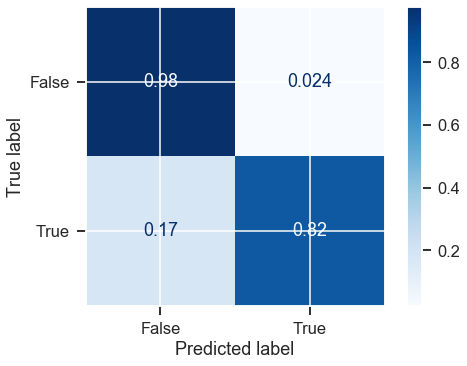

Random Forest:



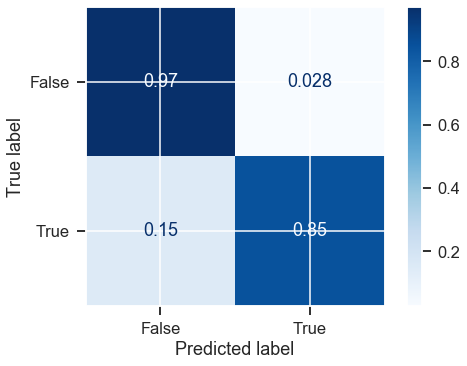

XGBoost:



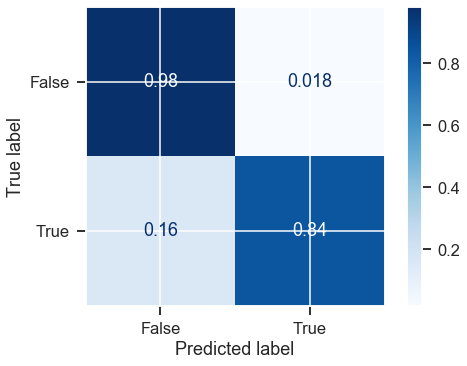

In [73]:
sns.set_context('talk')
norm_cm(clf_df_best, X_test, y_test, X_test_xgb, y_test_xgb)

In [67]:
clf_reports(clf_df_best, X_test, y_test, X_test_xgb, y_test_xgb)

Bagging Decision Tree: 

              precision    recall  f1-score   support

       False       0.98      0.85      0.91       714
        True       0.50      0.90      0.64       120

    accuracy                           0.85       834
   macro avg       0.74      0.87      0.78       834
weighted avg       0.91      0.85      0.87       834

Random Forest: 

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       714
        True       0.84      0.85      0.84       120

    accuracy                           0.95       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.95      0.95      0.95       834

XGBoost: 

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       714
        True       0.89      0.84      0.86       120

    accuracy                           0.96       834
   macro avg       0.93      0.91      0.92       834
weighted avg       0.

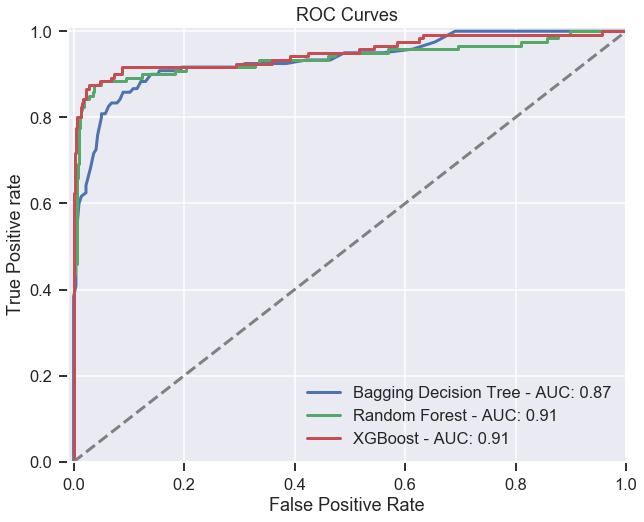

In [68]:
# Plot ROC curves

plot_roc(clf_df_best)

In [69]:
# Print out table of accuracy scores

acc_df(clf_df_best)

Classifier,Accuracy,AUC,Recall
XGBoost,0.96,0.91,0.84
Random Forest,0.95,0.91,0.85
Bagging Decision Tree,0.85,0.87,0.90


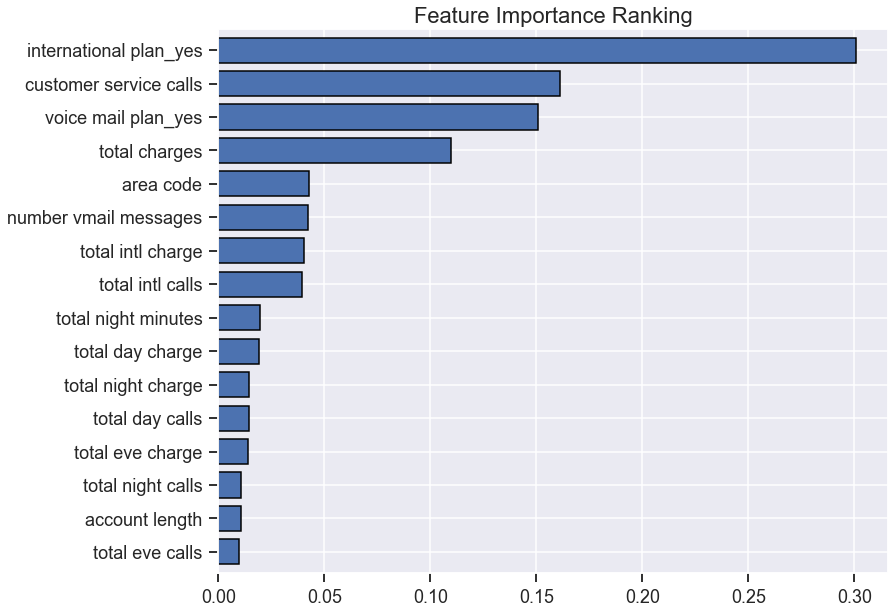

In [70]:
# Print feature importance plot

feat_rank(xgb_clf_best,X)

## Conclusion

## Recommendations

## Future Work